In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/BTC_USD2.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-01-01,BTC,768.40783,744.17249,772.95900,733.19433
2014-01-02,BTC,769.09849,768.40783,774.26333,750.52516
2014-01-03,BTC,804.02719,769.09849,826.34166,768.15367
2014-01-04,BTC,813.31748,804.02719,839.85833,798.11833
2014-01-05,BTC,871.11583,813.31748,873.98000,808.71666


# SARIMAX

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
# Create an SARIMA model
sari_model = SARIMAX(df["Closing Price (USD)"], order=(1, 1, 1), seasonal_order=(1,1,0, 5))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [5]:
# fit model
sari_model_fit = sari_model.fit()

In [6]:
# one step forecast
yhat = sari_model_fit.forecast()

In [7]:
sari_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Closing Price (USD)   No. Observations:                 2768
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 5)   Log Likelihood              -22035.884
Date:                            Tue, 03 Aug 2021   AIC                          44079.768
Time:                                    20:36:25   BIC                          44103.462
Sample:                                01-01-2014   HQIC                         44088.326
                                     - 07-30-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9985      0.019    -51.265      0.000      -1.037      -0.960
ma.L1          0.9974      0.021     48.070      0.000       0.957       1.038
ar.S.L5       -0.5540      0.006    -89.755      0.000      -0.566      -0.542
sigma2       4.98e+05   3825.685    130.168      0.000     4.9e+05    5.05e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.10   Jarque-Bera (JB):             64128.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            2874.22   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
new_df = df.rename(columns={'Closing Price (USD)':'Close'})

In [9]:
new_df = new_df.drop(columns={'Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'})

In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(new_df.Close, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.4479563921594139
2. P-Value :  0.9017786358874913
3. Num Of Lags :  28
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2739
5. Critical Values :
	 1% :  -3.4327397185476918
	 5% :  -2.8625958054606793
	 10% :  -2.5673320392686283


In [11]:
rolling_mean = new_df.rolling(window = 12).mean()

In [12]:
rolling_mean = rolling_mean.dropna()

In [13]:
rolling_mean

,Close
Date,
2014-01-12,861.014452
2014-01-13,869.753106
2014-01-14,877.636472
2014-01-15,881.738928
2014-01-16,886.801984
...,...
2021-07-26,32512.184364
2021-07-27,33110.580323
2021-07-28,33804.009905


<ipython-input-14-8bc788f747a6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot()


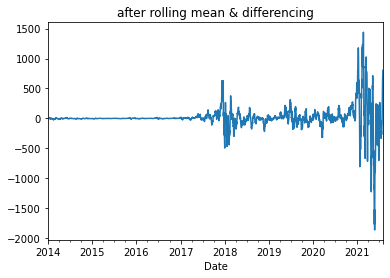

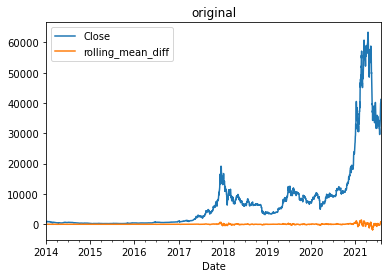

In [14]:
new_df['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
new_df['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
new_df.plot(title='original');

In [15]:
dftest2 = adfuller(new_df['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest2[0])
print("2. P-Value : ", dftest2[1])
print("3. Num Of Lags : ", dftest2[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest2[3])
print("5. Critical Values :")
for key, val in dftest2[4].items():
    print("\t",key, ": ", val)

1. ADF :  -6.106803152815379
2. P-Value :  9.541406546825369e-08
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2728
5. Critical Values :
	 1% :  -3.4327493635995006
	 5% :  -2.8626000650414487
	 10% :  -2.5673343070718775


In [16]:
new_df

,Close,rolling_mean_diff
Date,,
2014-01-01,768.407830,NaN
2014-01-02,769.098490,NaN
2014-01-03,804.027190,NaN
2014-01-04,813.317480,NaN
2014-01-05,871.115830,NaN
...,...,...
2021-07-26,37114.296624,342.540308
2021-07-27,38963.922857,598.395959
2021-07-28,39917.449369,693.429582


In [17]:
# Create an ARIMA Model and fit it to the data
from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(new_df["Close"], order=(1, 1, 1))
results3 = model3.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

In [18]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2767
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21607.985
Method:                       css-mle   S.D. of innovations            595.997
Date:                Tue, 03 Aug 2021   AIC                          43223.971
Time:                        20:36:27   BIC                          43247.673
Sample:                    01-02-2014   HQIC                         43232.531
                         - 07-30-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.5966     11.093      1.316      0.188      -7.146      36.339
ar.L1.D.Close    -0.6927      0.193     -3.592      0.000      -1.071      -0.315
ma.L1.D.Close     0.6573      0.201      3.263      0.001       0.262       1.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4435           +0.0000j            1.4435            0.5000
MA.1           -1.5213           +0.0000j            1.5213            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
print(len(new_df))

2768


<AxesSubplot:xlabel='Date'>

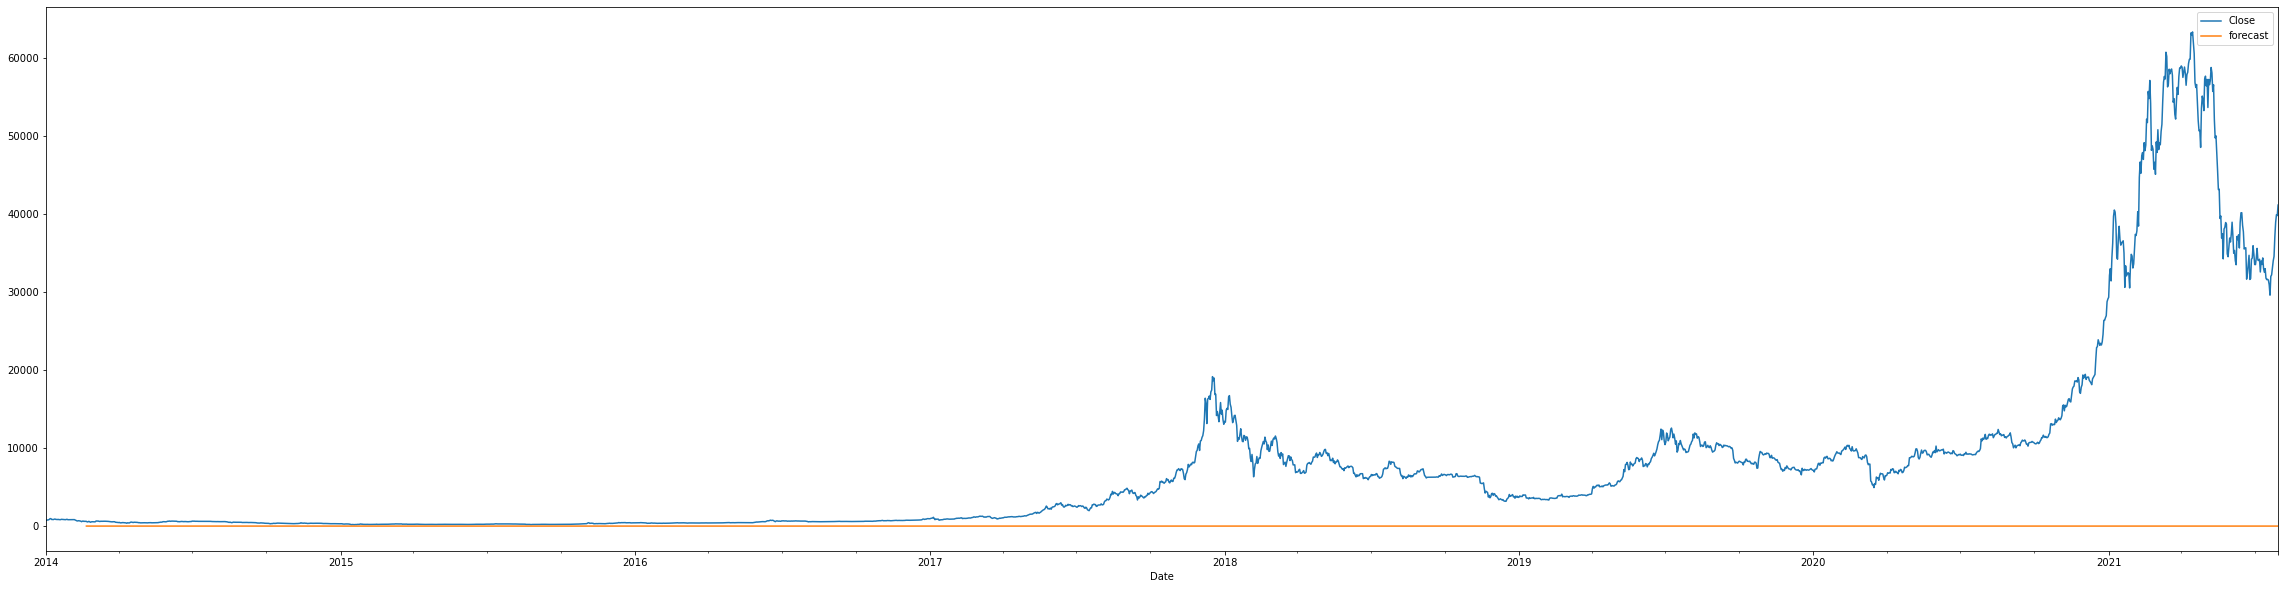

In [20]:
new_df['forecast']=results3.predict(start=50,end=2800,dynamic=True)
new_df[['Close','forecast']].plot(figsize=(40,10))

In [21]:
model4=ARIMA(new_df['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model4.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D

<AxesSubplot:xlabel='Date'>

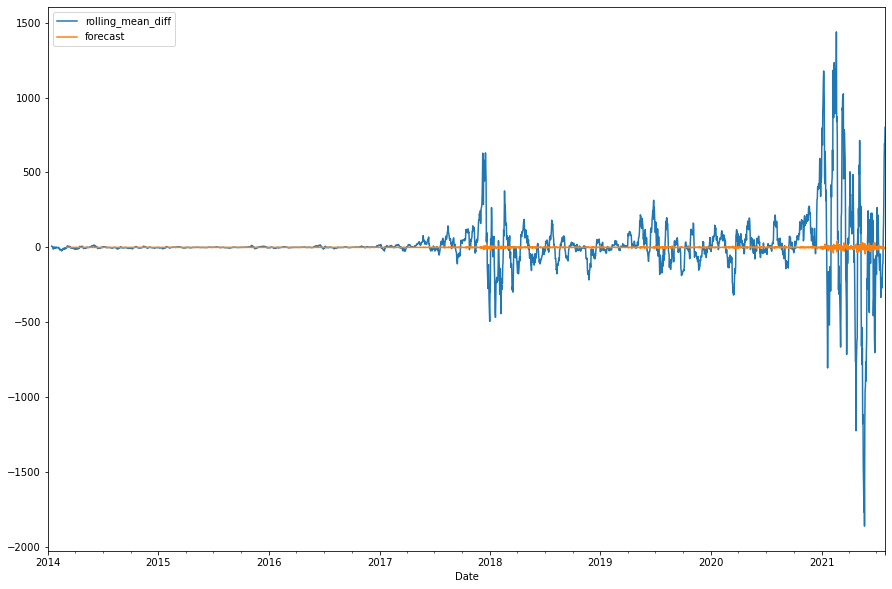

In [22]:
new_df['forecast']=model_fit.predict(start=50,end=2800,dynamic=False)
new_df[['rolling_mean_diff','forecast']].plot(figsize=(15,10))

In [23]:
import statsmodels.api as sm

In [24]:
saridf = df.drop(columns={'Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'})
saridf = saridf.rename(columns={'Closing Price (USD)':'Close'})

In [25]:
model5=sm.tsa.statespace.SARIMAX(saridf['Close'],order=(0, 1, 0),seasonal_order=(1,1,1,8))
results5=model5.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

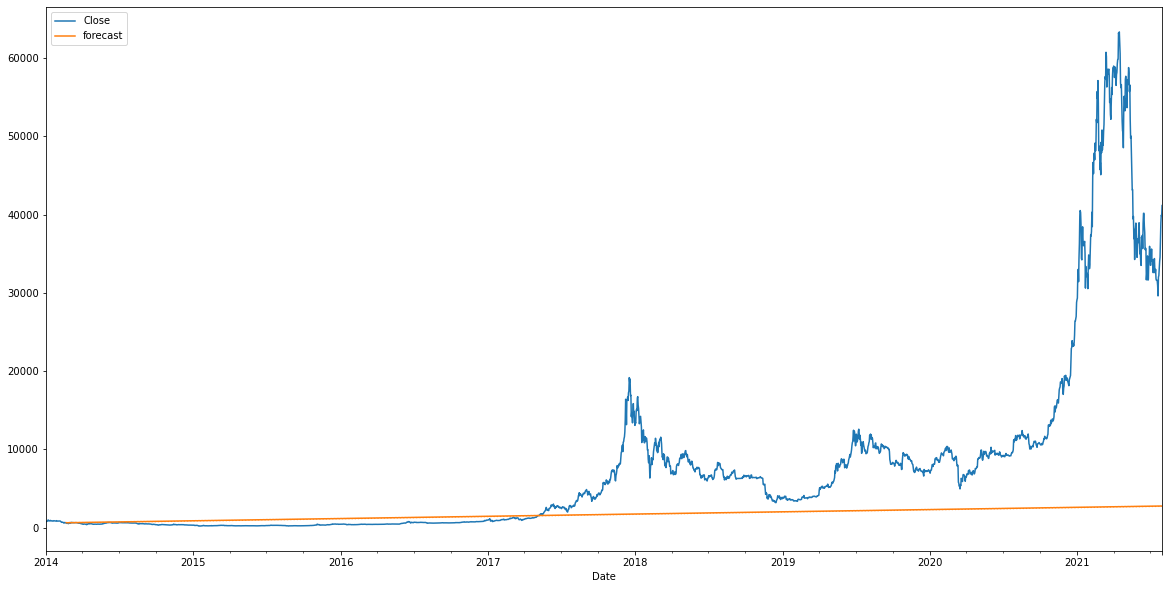

In [26]:
saridf['forecast']=results5.predict(start=50,end=2800,dynamic=True)
saridf[['Close','forecast']].plot(figsize=(20,10))

In [27]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 2768
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 8)   Log Likelihood              -21568.398
Date:                             Tue, 03 Aug 2021   AIC                          43142.797
Time:                                     20:36:29   BIC                          43160.565
Sample:                                 01-01-2014   HQIC                         43149.215
                                      - 07-30-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L8       -0.0508      0.006     -8.406      0.000      -0.063      -0.039
ma.S.L8       -0.9999      0.079    -12.648      0.000      -1.155      -0.845
sigma2      3.555e+05   2.76e+04     12.885      0.000    3.01e+05     4.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):             78354.49
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):            2963.35   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
print(saridf)

                   Close     forecast
Date                                 
2014-01-01    768.407830          NaN
2014-01-02    769.098490          NaN
2014-01-03    804.027190          NaN
2014-01-04    813.317480          NaN
2014-01-05    871.115830          NaN
...                  ...          ...
2021-07-26  37114.296624  2764.270395
2021-07-27  38963.922857  2748.148552
2021-07-28  39917.449369  2763.288209
2021-07-29  39810.517971  2753.331034
2021-07-30  41157.154833  2725.845444

[2768 rows x 2 columns]
